## EDA
2019.12.01 ~

### import package

In [108]:
# -*- coding: cp949 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
%matplotlib inline

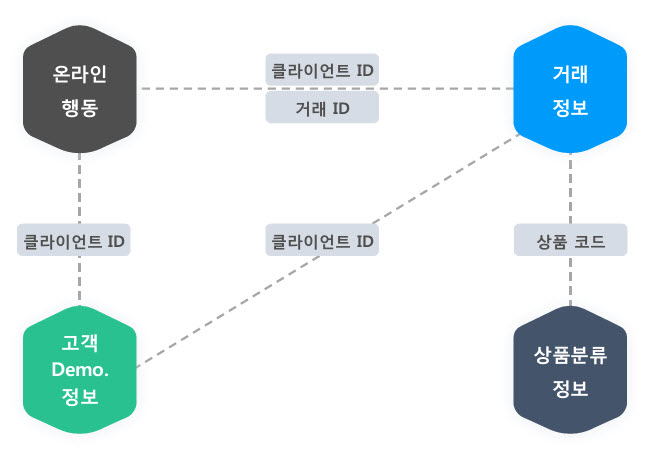

In [42]:
Image("데이터 흐름도.jpg")

In [68]:
online = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv')
transaction = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv')
client = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
products = pd.read_csv('제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

In [46]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [47]:
# Check NA
np.sum(pd.isnull(online))

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

In [97]:
# id별 중복되는 session_id 수
online.groupby(['clnt_id'])['sess_id'].count()

clnt_id
1         10
2        249
3         10
4          2
5          1
        ... 
72425     25
72426      8
72427     26
72428      7
72429      2
Name: sess_id, Length: 72399, dtype: int64

In [49]:
# trfc_src별 집계
online.groupby(['trfc_src']).count()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,dvc_ctg_nm
trfc_src,,,,,,,,,,,,,
DIRECT,1715541,1715541,1715541,1715541,1715541,1715541,1715541,1715541,21227,323858,1715236,1713212,296627
PORTAL_1,40669,40669,40669,40669,40669,40669,40669,40669,459,16583,40668,39946,40669
PORTAL_2,30642,30642,30642,30642,30642,30642,30642,30642,347,7171,30638,30599,30642
PORTAL_3,9792,9792,9792,9792,9792,9792,9792,9792,80,2587,9787,8985,9792
PUSH,523300,523300,523300,523300,523300,523300,523300,523300,6002,71176,523184,522918,160901
WEBSITE,49472,49472,49472,49472,49472,49472,49472,49472,745,10294,49428,40436,48208
unknown,826946,826946,826946,826946,826946,826946,826946,826946,28129,219969,825993,782659,826946


In [95]:
# clnt_id 별 유입경로(trfc_src) 분포 알아보기
online.groupby(['clnt_id','trfc_src'])['trfc_src'].count()

clnt_id  trfc_src
1        unknown      10
2        DIRECT      249
3        unknown      10
4        unknown       2
5        PUSH          1
                    ... 
72425    unknown      25
72426    DIRECT        8
72427    unknown      26
72428    unknown       7
72429    DIRECT        2
Name: trfc_src, Length: 79689, dtype: int64

In [69]:
# sech_kwd 개수
search_kwd = online[online['sech_kwd'].notnull()]['sech_kwd'].value_counts()
search_kwd = pd.DataFrame(search_kwd)

In [176]:
Top200_kwd = search_kwd[search_kwd['sech_kwd']>=200]  # 대부분 식품
Top200_kwd.reset_index(inplace=True)
Top200_kwd.columns = ['sech_kwd', 'cnt']
Top200_kwd

,sech_kwd,cnt
0,우유,8985
1,두부,5210
2,계란,5039
3,생수,4283
4,수박,2694
...,...,...
351,컵밥,203
352,생수500ml삼다수,203
353,제로콜라,202
354,앞다리,201


In [179]:
search_kwd['sech_kwd'].sum() - Top200_kwd['cnt'].sum()
# 포함시키지 못한 검색 키워드 갯수 437345개 -> 사용불가?

437345

In [157]:
# 행동유형별 sech_kwd 

In [102]:
# 행동유형 개수
# 0:검색
# 1:제품 목록
# 2:제품 세부정보 보기
# 3:장바구니 제품 추가
# 4:장바구니 제품 삭제
# 5:결제 시도
# 6:구매 완료
# 7:구매 환불
# 8:결제 옵션
online['action_type'].value_counts()  # 5 -> 6으로 가는 갯수 적음
# 750530 - 56249 = 694281

5    750530
2    655266
0    651638
3    596765
1    307998
4    172240
6     56249
7      5676
Name: action_type, dtype: int64

In [185]:
# Top200_kwd내에서 구매완료한(action_type=6) 갯수 알아보기
# len(set(Top200_kwd['sech_kwd'])) : 356개로 중복된 값 없음
kwd_type_6 = []  # 빈 list

for i in online['sech_kwd']:
    if i in set(Top200_kwd['sech_kwd']):
        
    

{'la갈비',
 '가지',
 '각티슈',
 '간장',
 '갈비',
 '갈치',
 '감자',
 '감자튀김',
 '거봉',
 '결과 내 재 검색',
 '계란',
 '계란30',
 '고구마',
 '고기',
 '고등어',
 '고무장갑',
 '고추',
 '고추가루',
 '고추장',
 '골뱅이',
 '과일',
 '과자',
 '구찌가방',
 '국거리',
 '국수',
 '굴소스',
 '귤',
 '김',
 '김밥',
 '김밥김',
 '김밥세트',
 '김밥재료',
 '김밥햄',
 '김자반',
 '김치',
 '깻잎',
 '꽃게',
 '나이키',
 '나이키운동화',
 '냉면',
 '너구리',
 '누룽지',
 '다시다',
 '다우니',
 '다진마늘',
 '다짐육',
 '단무지',
 '단호박',
 '달걀',
 '닭',
 '닭가슴살',
 '닭갈비',
 '닭볶음탕',
 '당근',
 '당면',
 '대파',
 '대패삼겹살',
 '돈까스',
 '동그랑땡',
 '돼지갈비',
 '돼지고기',
 '돼지고기 앞다리',
 '된장',
 '두부',
 '두유',
 '디스커버리',
 '딸기잼',
 '떡',
 '떡갈비',
 '떡국떡',
 '떡볶이',
 '떡볶이떡',
 '또띠아',
 '라면',
 '라코스테',
 '라코스테 원피스',
 '락스',
 '레몬',
 '롱원피스',
 '마늘',
 '마요네즈',
 '만두',
 '맛살',
 '맛술',
 '망고',
 '매일우유',
 '맥심',
 '맥주',
 '메론',
 '메추리알',
 '멸균우유',
 '멸치',
 '모닝빵',
 '모이몰른',
 '모짜렐라치즈',
 '목살',
 '목우촌',
 '무',
 '무우',
 '물',
 '물만두',
 '물티슈',
 '미림',
 '미쏘',
 '미역',
 '밀가루',
 '바나나',
 '바나나우유',
 '바디워시',
 '바지락',
 '반찬',
 '방울토마토',
 '배',
 '배추',
 '백산수',
 '버섯',
 '버터',
 '베베드피노',
 '베이컨',
 '베이킹소다',
 '보리차',
 '복숭아',
 '볶음밥',
 '부대찌개',
 '부추',
 '

In [117]:
# 초 분으로 변환하기
online['hit_pss_min'] = round(online['hit_pss_tm']/60, 3)

# 분 시간으로 변환하기
online['hit_pss_hour'] = round(online['hit_pss_min']/60, 3)

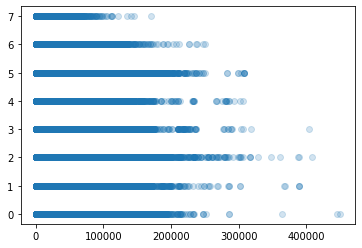

In [116]:
# 조회경과시간(분)과 행동유형 plot
plt.rcParams['agg.path.chunksize'] = 20000
plt.plot('hit_pss_min', 'action_type', data=online,
         linestyle='none', marker='o', alpha=0.2)
plt.show()

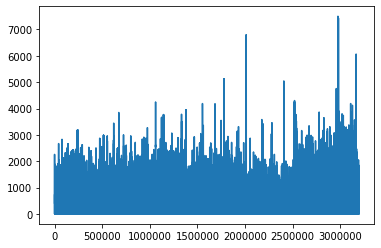

In [121]:
# hit_pss_hour 분포 확인
plt.plot(online['hit_pss_hour'])

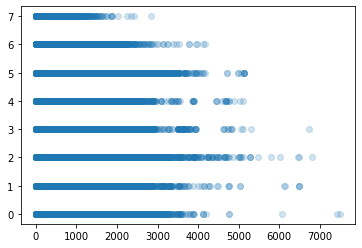

In [118]:
# 조회경과시간(시간)과 행동유형 plot
plt.plot('hit_pss_hour', 'action_type', data=online,
         linestyle='none', marker='o', alpha=0.2)
plt.show()

### 논의해야 할 사항
1. 비식별고객은 제외하고 분석 할건지?
2. 검색어 sech_kwd 특수문자 제거하고 할건지?
3. 구매시간대 별 구매추천?
4. 고객 클러스터링 어떤 방식으로 진행할지?